In [144]:
from pyimzml.ImzMLParser import ImzMLParser
mzml_file = "Data\Restenosis Files From Jill\imzmLs\Control_Day03_01.imzML"
mzml_file = "Data\Restenosis Files From Jill\imzmLs\Injured_Day03_01.imzML"
mzml_file = "C:\Users\John\Documents\School\19 Summer\532 ML\CS 532 Project\Data\Restenosis Files From Jill\imzmLs\Control_Day03_01.imzML"
p = ImzMLParser(mzml_file)
print(mzml_file)
import pickle
import gzip

Data\Restenosis Files From Jill\imzmLs\Injured_Day03_01.imzML


In [145]:
out = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    entry = {
        "idx": idx,
        "x": x,
        "y": y,
        "z": z,
        "mzs": mzs,
        "intensities": intensities
    }
    out.append(entry)
    
    

In [146]:
with open('test_pickle_dump', 'wb') as readfile:
    pickle.dump(out, readfile)

In [147]:
import gzip
import shutil
with open('test_pickle_dump', 'rb') as f_in:
    with gzip.open('test_pickle_dump.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [143]:
mzs, intensities = out[0]["mzs"], out[0]["intensities"]
mzs

array([450.03807824, 450.04168496, 450.04529173, ..., 999.47473251,
       999.48666956, 999.49860683])

In [32]:
import pandas as pd

In [60]:
df  = pd.DataFrame({"mzs": mzs, "intensities": intensities})

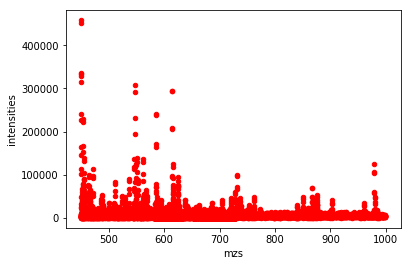

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='mzs',y='intensities',color='red')
plt.show()

In [55]:
import scipy.signal
indices = scipy.signal.find_peaks(out[0]["intensities"], 50*1000)
indices

(array([   4,   35,   89,  160,  174,  199,  221,  242,  379,  443,  476,
         630,  995, 1485, 1742, 2019, 2176, 2254, 2275, 2312, 2345, 2414,
        2587, 2635, 2722, 2772, 3106, 3124, 4145, 4183, 4194, 4226, 4274,
        4507, 4515, 4544, 6874, 6984, 8651, 8796, 9837], dtype=int64),
 {'peak_heights': array([336226.5       , 458137.90625   ,  66445.8828125 ,  69926.5234375 ,
         228750.53125   ,  78522.3515625 , 138201.15625   ,  91352.7734375 ,
          76474.46875   ,  99700.9453125 ,  65737.0546875 , 113465.703125  ,
          52734.22265625,  83385.8515625 ,  51059.0390625 ,  89987.203125  ,
         137024.390625  , 307728.09375   , 125371.671875  ,  56474.4453125 ,
         139278.4375    ,  86838.34375   , 136474.03125   ,  56258.859375  ,
          64681.6875    ,  50638.453125  , 241909.9375    ,  71194.7421875 ,
         295159.375     ,  72431.078125  , 124698.6953125 ,  59953.1484375 ,
          57681.203125  ,  93715.015625  ,  75006.9296875 ,  76485.2265625 

In [56]:
df2 = df[df.index.isin(indices[0])]

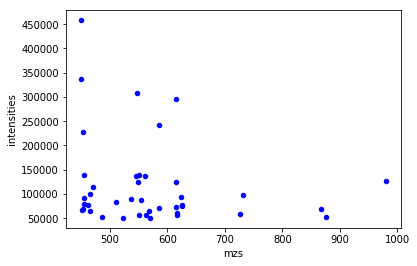

In [57]:
df2.plot(kind='scatter',x='mzs',y='intensities',color='blue')
plt.show()

In [67]:
len(df2)
import numpy as np

In [104]:
A = pd.DataFrame(np.zeros((len(p.coordinates), 560)))
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    df  = pd.DataFrame({"mzs": mzs, "intensities": intensities})
    indices = scipy.signal.find_peaks(intensities, 50*1000)
    df2 = df[df.index.isin(indices[0])]
    df2 = df2.round({'mzs': 0, 'intensities': 2})
    df2.loc[:,'mzs'] -= 450
    for index, row in df2.iterrows():
        mz, intensity = int(row['mzs']), round(row['intensities'],2)
        print(mz, end=' ')
        A[idx][mz] += intensity

0 0 1 3 3 4 5 5 12 15 15 21 37 61 73 87 95 97 98 100 101 103 111 113 117 119 135 136 164 165 165 166 167 174 175 175 277 281 418 426 529 0 0 1 3 3 5 5 12 15 15 21 36 37 61 79 87 95 97 98 100 101 103 111 117 135 136 137 144 164 165 165 166 167 174 175 175 187 213 235 237 255 271 277 281 287 389 400 418 422 453 529 530 0 0 117 135 164 165 165 175 529 0 0 3 5 12 15 15 21 61 95 97 101 117 135 136 137 164 165 173 175 529 0 0 5 95 97 101 135 137 164 165 165 175 529 0 0 3 5 12 15 21 61 95 97 101 135 137 164 165 165 175 0 0 5 12 15 15 21 36 37 61 95 97 100 101 111 117 135 137 164 165 174 175 277 287 0 0 3 5 12 15 51 97 101 117 135 164 165 165 175 0 0 5 12 97 101 117 135 137 164 165 0 0 3 5 12 15 15 21 37 61 95 97 101 117 135 136 137 164 165 165 175 287 529 0 0 3 5 12 15 15 21 61 95 97 101 111 135 136 137 164 165 165 173 175 529 0 0 5 12 15 21 61 101 117 135 136 164 165 175 0 0 5 95 101 135 136 164 165 165 175 529 0 0 5 12 95 135 137 164 165 175 0 0 3 5 12 15 21 37 61 97 101 111 117 135 137 164

0 0 3 5 12 15 21 37 61 95 97 101 117 135 136 164 165 175 187 271 0 0 3 5 12 15 21 37 61 95 97 100 101 117 135 136 164 165 165 173 175 176 237 271 277 453 0 0 3 5 12 15 21 61 95 97 100 101 117 135 136 164 165 165 173 175 237 271 277 529 0 0 5 21 95 97 101 135 136 164 165 165 175 271 0 0 3 5 12 15 21 51 61 95 97 101 117 135 136 153 164 165 165 175 207 237 271 277 529 0 0 5 15 21 37 61 95 97 101 135 136 164 165 165 175 271 277 529 0 0 5 21 95 97 101 135 136 153 164 165 165 173 175 176 207 271 0 0 15 21 61 95 97 101 117 135 136 153 164 165 165 173 175 237 271 0 0 3 5 12 15 21 37 37 38 61 94 95 97 98 100 101 111 117 135 136 137 139 153 164 165 165 175 235 237 271 277 453 0 0 3 5 12 21 37 59 61 95 97 100 101 135 136 137 164 165 165 173 175 235 237 271 277 287 453 529 0 0 3 5 12 15 21 37 59 61 95 97 100 101 117 133 135 136 137 153 164 165 165 173 175 235 237 271 277 453 529 0 0 3 5 12 15 21 37 37 61 95 97 100 101 117 135 136 137 164 165 165 173 175 235 237 271 277 453 529 0 0 5 15 21 95 97 13

334 335 336 342 343 355 360 361 381 383 386 388 389 389 405 411 418 447 452 453 454 469 483 0 0 1 1 5 5 6 7 7 9 12 13 15 15 15 16 17 19 21 22 25 28 31 32 33 36 37 37 39 46 47 48 51 53 56 58 59 60 61 68 69 70 73 73 74 75 79 84 94 95 95 96 96 97 97 98 99 100 101 102 102 103 107 111 112 116 117 130 133 134 135 135 136 137 144 144 145 152 157 158 160 161 163 164 165 166 166 166 167 167 167 169 171 172 173 173 174 175 180 182 183 186 188 194 194 195 200 201 201 204 207 208 210 211 212 213 216 216 222 223 228 229 229 234 235 236 237 238 239 244 245 247 248 250 251 254 255 255 266 270 271 271 272 272 272 275 276 276 277 277 278 278 279 282 285 286 287 287 288 293 300 304 305 307 308 309 311 311 313 314 323 331 332 333 334 335 336 342 342 343 359 360 361 366 381 386 388 388 389 389 405 411 413 447 452 453 454 469 483 484 0 0 1 1 3 5 5 6 7 9 10 12 13 15 15 15 16 17 19 21 22 28 30 31 33 36 37 37 39 46 47 48 51 53 56 58 59 60 61 62 68 69 73 73 74 75 78 79 84 94 95 95 96 96 97 97 98 99 100 101 102

178 180 182 183 184 186 187 188 189 191 192 194 195 195 197 200 200 201 201 204 206 207 207 208 210 211 212 212 213 216 216 217 222 222 223 228 229 229 231 231 232 234 234 235 236 237 238 239 244 244 245 246 247 248 250 251 254 255 255 256 262 266 270 271 271 272 272 272 273 274 275 276 276 277 277 278 278 279 279 282 283 285 286 287 287 287 288 293 293 293 295 296 300 302 303 304 305 306 307 308 309 310 310 311 311 312 313 314 323 324 325 327 329 330 331 332 332 333 333 334 335 336 337 338 341 342 342 355 356 357 358 359 360 360 361 361 362 363 363 364 365 366 367 370 381 383 384 384 385 385 385 386 387 388 389 389 390 398 405 407 411 412 413 446 447 452 452 453 454 469 482 483 484 529 0 0 0 1 1 3 5 5 6 7 9 12 13 15 15 16 17 19 20 21 22 22 28 36 37 37 39 46 47 51 58 59 60 61 68 69 72 73 73 74 75 79 84 92 94 95 95 96 96 97 97 99 100 101 102 102 107 107 111 112 116 117 130 133 134 135 135 136 137 137 144 144 145 152 156 157 158 160 161 163 164 165 165 166 166 167 167 171 172 173 173 174

 271 271 272 276 277 287 311 411 413 452 453 454 529 0 0 3 5 12 21 37 38 59 61 68 95 96 97 98 100 101 102 117 135 136 137 153 157 164 165 165 173 174 175 176 213 235 236 237 271 271 272 276 277 287 293 307 311 389 411 413 452 453 454 529 0 0 1 1 3 5 5 7 9 12 13 15 15 16 17 19 20 21 22 36 37 37 39 39 46 47 51 53 58 59 60 61 68 69 73 73 74 75 79 94 95 95 96 96 97 97 99 100 101 102 103 107 111 117 133 134 135 136 137 144 157 164 165 165 166 166 167 171 173 174 175 175 176 182 187 194 195 197 201 207 212 213 222 229 234 235 236 237 247 249 250 255 270 271 271 272 272 276 276 277 277 278 279 285 286 287 288 293 307 308 311 311 331 333 334 335 336 355 359 389 405 407 407 411 412 413 417 418 447 452 453 454 469 529 0 0 1 1 3 5 5 6 7 9 12 13 15 15 15 16 17 19 21 25 28 30 31 33 33 35 36 37 37 39 46 47 50 51 53 58 59 60 61 62 68 69 72 73 73 74 75 78 79 84 94 95 95 96 96 96 97 97 98 98 99 100 101 102 102 103 107 110 111 116 117 118 133 135 136 137 144 144 145 157 160 163 164 165 166 166 166 167 1

172 172 173 174 175 175 176 182 187 191 194 195 197 200 200 201 202 203 206 207 210 212 213 214 222 223 228 229 230 231 234 235 236 237 238 238 244 247 249 250 254 254 255 256 270 271 271 272 272 275 276 276 277 277 278 279 280 285 286 287 287 288 293 301 303 304 307 308 309 311 313 331 333 333 334 335 342 347 371 373 383 388 388 389 390 405 406 407 411 412 413 418 426 431 446 447 448 451 452 453 454 469 483 501 523 529 0 0 1 3 3 5 5 12 15 15 17 21 36 37 38 39 46 59 60 61 68 73 79 87 95 96 96 97 98 100 101 102 103 111 113 117 117 133 135 136 137 144 153 157 164 165 165 166 166 167 171 173 174 175 175 176 197 201 213 235 236 237 255 271 271 272 276 277 278 279 281 287 288 311 389 407 411 413 418 426 452 453 454 529 0 0 3 5 12 21 36 37 59 61 95 97 98 100 101 102 111 117 135 136 137 157 164 165 165 171 173 174 175 213 235 236 237 271 271 272 276 277 287 293 407 411 413 452 453 529 0 0 5 12 15 21 37 61 95 97 98 100 101 135 136 164 165 175 237 271 272 407 0 0 12 21 37 59 61 95 97 100 101 10

175 235 236 237 271 271 272 276 277 279 281 287 311 407 411 413 452 453 529 0 0 5 12 15 17 21 37 38 51 59 61 73 95 97 98 100 101 111 117 133 135 136 137 144 153 164 165 165 167 173 174 175 175 176 187 235 237 271 272 277 279 287 311 407 453 529 0 0 3 5 12 15 21 37 51 59 61 73 95 96 97 98 100 101 111 113 133 135 136 153 157 164 165 165 173 174 175 187 235 237 271 271 272 277 281 287 407 453 529 0 0 3 5 12 21 37 51 59 61 95 97 98 100 101 102 111 113 117 133 135 136 137 144 153 157 164 165 165 173 174 175 175 176 187 197 235 236 237 271 272 276 277 279 287 300 311 407 411 412 413 452 453 529 0 0 3 12 21 37 61 95 97 98 100 101 135 136 153 157 164 165 165 173 175 176 197 235 237 271 272 277 311 407 413 453 529 0 0 5 12 15 21 36 37 38 59 61 95 96 97 98 100 101 102 117 135 136 153 157 164 165 165 173 175 213 235 237 271 272 276 277 287 453 529 0 0 5 12 21 37 37 59 61 95 97 100 101 117 135 136 164 165 165 175 235 237 271 276 277 453 529 0 0 5 12 21 37 37 51 59 61 95 97 98 100 101 117 135 136 1

0 0 5 12 21 37 59 61 95 97 98 100 101 117 135 136 164 165 165 173 174 175 235 237 271 276 277 287 407 453 529 0 0 5 12 21 61 95 97 100 101 135 136 164 165 165 175 271 272 277 0 0 3 5 12 21 37 61 95 97 98 100 101 135 136 164 165 173 175 235 237 271 272 277 407 453 0 0 5 12 21 37 46 59 61 68 95 96 97 100 101 102 111 117 135 136 153 157 164 165 165 173 174 175 176 197 213 231 235 237 271 271 272 276 276 277 278 285 307 308 311 333 335 389 407 452 453 529 0 0 1 1 5 5 7 9 12 13 15 15 16 17 19 21 22 28 31 33 36 37 37 39 46 47 51 53 58 59 60 61 68 69 72 73 73 74 75 79 84 94 95 95 96 96 97 97 98 99 100 101 102 103 107 107 111 117 133 134 135 136 137 144 144 157 160 163 164 165 165 166 166 166 167 167 171 172 173 174 175 175 182 187 194 195 195 200 201 207 210 212 213 216 222 223 228 229 231 231 235 236 237 238 247 250 254 255 270 271 271 272 272 276 276 277 277 278 279 280 285 286 287 288 293 300 304 305 307 308 309 311 311 313 331 333 334 335 336 342 355 360 383 388 388 389 389 405 407 411 41

342 355 356 359 360 361 361 362 366 383 383 386 387 388 389 389 405 407 407 411 412 413 418 446 447 452 453 454 469 483 529 0 0 1 1 5 5 6 9 12 13 15 15 15 17 19 19 21 28 30 31 35 36 37 37 37 38 39 39 46 47 51 52 53 58 59 60 61 62 67 68 69 70 72 73 73 74 75 78 79 84 87 94 95 95 96 97 97 98 99 100 101 102 103 107 111 112 116 117 130 133 135 135 136 136 137 139 144 145 151 152 153 157 160 163 164 165 165 166 166 167 167 170 171 171 172 173 173 174 175 175 176 180 182 183 187 188 191 191 194 195 195 195 197 200 201 201 204 206 207 207 208 209 210 211 212 213 216 216 217 222 223 228 229 229 234 235 236 237 238 238 243 244 247 248 249 250 251 254 254 255 255 256 266 270 271 271 272 272 272 275 276 276 277 277 278 279 282 285 286 287 287 288 293 293 304 305 307 308 309 309 311 311 312 313 329 331 332 332 333 333 334 335 336 342 355 356 357 359 360 361 361 362 366 370 371 373 373 381 383 383 384 386 387 388 388 389 389 390 400 405 406 407 407 411 412 413 418 419 422 431 446 447 448 451 452 453

249 250 251 254 255 270 271 271 272 272 276 276 277 277 278 279 281 285 286 287 288 293 304 307 308 309 311 311 331 332 333 333 334 335 349 355 356 359 361 371 373 383 388 389 389 405 407 407 411 412 413 418 426 447 452 453 454 469 529 530 0 0 5 21 37 46 59 61 68 95 96 97 98 100 101 135 136 164 165 166 175 194 222 235 237 271 272 277 311 407 453 529 0 0 5 12 21 37 46 51 59 61 68 95 96 97 98 99 100 101 102 111 117 135 136 153 157 164 165 165 166 173 174 175 175 187 194 222 235 236 237 271 271 272 276 277 278 279 287 293 407 408 411 413 452 453 454 529 0 0 5 12 21 37 59 61 68 95 96 97 98 100 101 102 111 117 135 136 157 164 165 165 166 167 173 174 175 175 207 235 236 237 271 271 272 276 277 278 287 407 411 418 453 529 0 0 3 5 12 17 21 37 59 61 95 97 98 100 101 102 111 113 117 135 136 153 157 164 165 165 174 175 176 235 236 237 271 272 276 277 293 311 407 413 453 0 0 5 15 15 17 21 37 61 95 97 98 100 101 111 117 135 136 151 164 165 165 167 174 175 175 207 235 237 271 277 278 281 287 453 529

175 187 271 272 311 407 529 0 0 3 5 21 37 61 68 95 97 98 100 101 102 111 117 135 136 144 153 157 164 165 165 167 173 174 175 175 235 237 271 272 277 281 293 311 407 453 529 543 0 0 5 12 17 21 37 46 59 61 68 95 97 98 100 101 102 111 117 135 136 153 157 164 165 165 166 167 173 174 175 235 237 271 271 272 276 277 293 311 407 408 413 452 453 529 543 0 0 5 12 21 61 68 95 97 98 100 101 117 135 136 157 164 165 166 175 235 237 271 272 277 311 407 453 529 0 0 3 5 5 11 12 15 21 27 37 38 46 51 61 68 74 79 82 94 95 96 97 98 100 101 108 111 117 124 135 136 136 139 144 148 150 153 164 165 165 166 167 167 172 174 175 175 179 187 193 194 195 200 207 222 222 236 237 250 250 252 271 277 278 281 307 307 321 347 349 364 404 406 453 463 477 0 0 1 1 3 5 5 6 7 9 12 13 15 15 16 16 17 19 20 21 22 22 28 36 37 37 38 39 39 46 47 51 56 59 61 67 68 69 73 73 74 75 79 84 87 92 94 95 95 96 96 97 97 99 100 100 101 102 102 103 107 107 108 111 114 117 117 122 123 130 133 134 135 135 136 137 138 144 144 145 151 151 152 15

82 94 95 96 97 98 100 101 102 108 117 135 136 136 150 153 164 165 165 166 167 172 175 194 207 222 222 237 247 250 250 271 276 277 281 285 286 307 308 311 331 333 334 349 355 361 383 404 453 0 0 0 1 1 5 5 6 6 7 9 10 12 13 15 15 16 17 19 20 21 22 22 28 29 31 33 35 36 37 37 39 44 46 47 48 50 51 56 58 59 60 61 67 68 69 70 72 73 73 74 75 76 78 79 84 92 94 95 95 96 96 97 97 97 98 98 99 100 100 101 102 102 103 107 107 108 111 112 114 117 117 122 123 130 133 134 135 135 136 136 137 138 144 144 145 151 152 156 157 158 160 161 163 164 165 165 166 166 166 167 167 167 168 169 170 172 173 173 174 175 175 178 179 180 182 183 184 186 187 188 189 191 192 194 194 195 200 201 201 204 206 207 207 208 210 211 212 213 214 216 216 217 222 222 222 223 228 229 229 231 231 232 232 234 234 235 236 236 237 238 239 244 244 245 246 247 248 248 250 251 254 255 255 257 262 266 270 271 271 271 272 272 272 273 274 276 276 277 277 278 278 279 279 280 282 283 285 286 287 287 293 293 293 295 300 303 304 305 305 307 308 3

101 102 111 117 135 136 153 157 164 165 165 166 167 173 174 175 175 194 222 235 236 237 271 271 272 276 277 281 287 293 407 411 413 452 453 529 0 0 5 5 12 17 21 37 39 46 51 59 61 68 95 96 97 98 99 100 101 102 111 117 135 136 144 144 153 157 164 165 165 166 167 173 174 175 175 182 194 222 235 236 237 271 271 272 276 277 279 281 287 307 311 407 418 452 453 454 529 530 543 0 0 5 5 12 17 21 36 37 39 46 59 61 68 69 74 95 96 97 98 99 100 101 102 103 111 117 135 136 137 144 144 153 157 164 165 165 166 166 167 173 174 175 175 176 182 194 197 200 213 222 234 235 236 237 250 271 271 272 276 277 278 279 281 287 293 293 307 311 323 373 389 407 408 411 412 413 418 452 453 454 469 503 529 530 543 0 0 5 12 21 37 46 51 61 68 74 95 96 97 98 100 101 111 135 136 144 144 164 165 165 166 172 174 175 175 182 187 194 200 222 235 237 250 271 271 272 277 285 307 311 349 407 453 529 0 0 3 5 15 17 21 37 38 39 46 51 61 68 74 82 95 96 96 97 98 100 101 107 108 111 113 124 133 135 136 136 139 144 150 153 153 157 164

229 229 231 231 232 234 234 235 236 237 238 239 244 244 245 246 247 248 248 250 250 251 254 254 255 255 257 262 266 270 271 271 272 272 272 273 274 274 276 276 276 277 277 278 278 279 279 282 283 285 286 286 287 287 288 293 293 293 295 296 297 302 304 305 305 307 308 309 310 310 311 311 312 313 314 323 324 327 329 330 331 332 332 333 333 333 334 335 336 337 338 338 339 341 342 342 355 356 357 358 358 359 360 360 361 361 362 362 363 363 363 364 365 366 367 370 381 383 384 384 385 385 385 386 387 388 389 389 390 398 405 407 407 411 412 413 447 452 452 453 454 460 469 482 483 484 529 531 0 0 1 1 5 5 6 9 12 15 15 17 19 20 21 22 28 31 36 37 37 37 38 39 46 47 51 59 61 68 69 73 74 75 79 79 80 87 92 95 96 96 97 97 98 100 101 102 102 103 107 107 111 117 117 123 133 135 135 136 137 139 144 144 145 151 152 153 157 160 163 164 165 165 165 166 166 167 167 167 172 173 173 174 174 175 175 176 178 182 184 187 188 191 194 195 197 200 201 206 207 210 213 216 217 222 222 223 228 229 231 234 235 236 236 2

KeyError: 560

In [105]:
len(p.coordinates)

900

In [108]:
A.loc[:2,:3]

,0,1,2,3
0,794364.38,570368.50,200856.44,392070.86
1,66445.88,50051.92,0.00,0.00
2,0.00,0.00,0.00,0.00


In [157]:
def idxs_to_bool(idxs, length=None):
    length = length or idxs[-1]+1
    ret = np.zeros(length,dtype=bool)
    for idx in idxs:
        ret[idx] = True;
    return ret
        

In [161]:
mzs, intensities = p.getspectrum(idx)
indices = scipy.signal.find_peaks(intensities, 50*1000)
df = pd.DataFrame({"mzs": mzs[idxs_to_bool(indices[0],len(mzs))], "intensities": indices[1]['peak_heights']})
df

9902 [False False False ... False False False]


,mzs,intensities
0,450.052518,71753.054688
1,450.362869,177504.390625
2,455.188956,69883.750000
3,501.038726,56191.523438
4,545.074401,64048.957031
5,547.413543,325705.593750
6,548.416485,115887.085938
7,550.011342,68751.687500
8,551.016549,175845.921875
9,585.065284,265468.781250
